# Artificial Neural Network
![ANN](ann.jpg) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Features: Age, Estimated Salary
X = np.array([
    [22, 50000], [25, 60000], [47, 120000], [52, 130000], [46, 115000],
    [56, 150000], [48, 110000], [55, 140000], [22, 50000], [23, 55000],
    [54, 135000], [48, 110000], [27, 65000], [30, 70000], [35, 75000],
    [40, 80000], [29, 62000], [33, 72000], [50, 125000], [31, 68000],
    [45, 112000], [53, 138000], [36, 76000], [38, 85000], [28, 58000],
    [26, 61000], [51, 129000], [34, 74000], [44, 108000], [32, 69000]
])

# Labels: 0 = Not Purchased, 1 = Purchased
Y = np.array([
    [0], [0], [1], [1], [1],
    [1], [1], [1], [0], [0],
    [1], [1], [0], [0], [1],
    [1], [0], [1], [1], [0],
    [1], [1], [1], [1], [0],
    [0], [1], [1], [1], [0]
])


In [3]:
# Min-Max Normalization of the data (age and salary)
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_normalized = (X - X_min) / (X_max - X_min)

# Check normalized data
print("Normalized Data (Age and Salary):\n", X_normalized)

Normalized Data (Age and Salary):
 [[0.         0.        ]
 [0.08823529 0.1       ]
 [0.73529412 0.7       ]
 [0.88235294 0.8       ]
 [0.70588235 0.65      ]
 [1.         1.        ]
 [0.76470588 0.6       ]
 [0.97058824 0.9       ]
 [0.         0.        ]
 [0.02941176 0.05      ]
 [0.94117647 0.85      ]
 [0.76470588 0.6       ]
 [0.14705882 0.15      ]
 [0.23529412 0.2       ]
 [0.38235294 0.25      ]
 [0.52941176 0.3       ]
 [0.20588235 0.12      ]
 [0.32352941 0.22      ]
 [0.82352941 0.75      ]
 [0.26470588 0.18      ]
 [0.67647059 0.62      ]
 [0.91176471 0.88      ]
 [0.41176471 0.26      ]
 [0.47058824 0.35      ]
 [0.17647059 0.08      ]
 [0.11764706 0.11      ]
 [0.85294118 0.79      ]
 [0.35294118 0.24      ]
 [0.64705882 0.58      ]
 [0.29411765 0.19      ]]


In [4]:
# Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Neural network architecture
input_layer_neurons = X_normalized.shape[1]  # 2 input features (normalized age, salary)
input_layer_neurons

2

In [5]:
hidden_layer_neurons = 3  # 2 neurons in the hidden layer
output_neuron = 1  # Binary classification (output 0 or 1)

In [6]:
# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_layer_neurons, hidden_layer_neurons)
b1 = np.zeros((1, hidden_layer_neurons))
W2 = np.random.randn(hidden_layer_neurons, output_neuron)
b2 = np.zeros((1, output_neuron))

# Training parameters
learning_rate = 0.01
epochs = 500


In [7]:
W1

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696]])

In [8]:
b1

array([[0., 0., 0.]])

In [9]:
W2

array([[ 1.57921282],
       [ 0.76743473],
       [-0.46947439]])

In [10]:
# Training the neural network
losses = []
accuracies = []  # To store accuracies
for epoch in range(epochs):
    # Forward Propagation
    Z1 = np.dot(X_normalized, W1) + b1
    A1 = relu(Z1)  # ReLU activation in the hidden layer
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)  # Sigmoid activation in the output layer
    
    # Compute the loss (binary cross-entropy)
    loss = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    losses.append(loss)
    
    # Backward Propagation
    dA2 = A2 - Y
    dZ2 = dA2
    dW2 = np.dot(A1.T, dZ2) #Finds how much the weights  W_2  (from hidden to output) contribute to the error.
    #If a hidden neuron’s output is high and the error is big, that weight needs a bigger change.
    #he hidden layer activations A_1  are multiplied by the error to see which weights need adjusting.
   
    db2 = np.sum(dZ2, axis=0, keepdims=True)  #sum the gradients across all samples,means total gradients for every activation neuron
    
    dA1 = np.dot(dZ2, W2.T) # the weights w2 distribute error to the hidden layer neuron,asking how much each hiden layer neuron contibute to error
    dZ1 = dA1 * relu_derivative(Z1)  # Using ReLU derivative Adjusts the hidden layer error based on the ReLU activation if 0 no gradients updates
    #gradient of the loss with respect to the pre-activation values of the hidden layer ($ Z_1 $).
    
    dW1 = np.dot(X_normalized.T, dZ1) #Finds how much the input-to-hidden weights contribute to the error.#
    #If an input feature is large and the error is big, that weight needs adjusting
    
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    # Calculate accuracy
    predictions = A2 > 0.5
    accuracy = np.mean(predictions == Y)
    accuracies.append(accuracy)
    print(f'Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy * 100:.2f}%')

Epoch 0, Loss: 0.438264868498924, Accuracy: 70.00%
Epoch 1, Loss: 0.4281013986611975, Accuracy: 70.00%
Epoch 2, Loss: 0.41912366913281623, Accuracy: 73.33%
Epoch 3, Loss: 0.4111956397947219, Accuracy: 73.33%
Epoch 4, Loss: 0.4047361540110886, Accuracy: 76.67%
Epoch 5, Loss: 0.3985256901812087, Accuracy: 80.00%
Epoch 6, Loss: 0.39252369893055306, Accuracy: 83.33%
Epoch 7, Loss: 0.3867051230907396, Accuracy: 83.33%
Epoch 8, Loss: 0.38105417631602967, Accuracy: 86.67%
Epoch 9, Loss: 0.3755605449424848, Accuracy: 90.00%
Epoch 10, Loss: 0.3702171001528472, Accuracy: 90.00%
Epoch 11, Loss: 0.365018535962153, Accuracy: 90.00%
Epoch 12, Loss: 0.3599605671378943, Accuracy: 90.00%
Epoch 13, Loss: 0.3550394621101141, Accuracy: 90.00%
Epoch 14, Loss: 0.3502517745838448, Accuracy: 90.00%
Epoch 15, Loss: 0.3456952433440886, Accuracy: 90.00%
Epoch 16, Loss: 0.3412987900331771, Accuracy: 90.00%
Epoch 17, Loss: 0.3370561077569398, Accuracy: 90.00%
Epoch 18, Loss: 0.33294568423534837, Accuracy: 90.00%
E

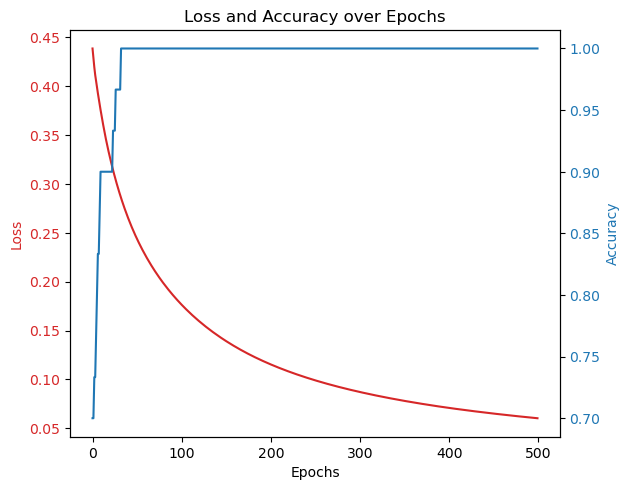

In [11]:
# Plotting the loss and accuracy over epochs
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(range(epochs), losses, color='tab:red', label="Loss")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Accuracy', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(range(epochs), accuracies, color='tab:blue', label="Accuracy")
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # adjust the layout to make space for both y-labels
plt.title("Loss and Accuracy over Epochs")
plt.show()


In [12]:
# Prediction on normalized input data
def predict(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)  # Use ReLU for hidden layer
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)  # Sigmoid for output layer
    return A2 > 0.5  # Binary classification threshold at 0.5

# Predictions on training data
predictions = predict(X_normalized)
accuracy = np.mean(predictions == Y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 100.00%


In [13]:
# Predict on new unseen input data (also normalize before predicting)
new_data = np.array([[28, 65000], [50, 130000]])  # New unseen data
new_data_normalized = (new_data - X_min) / (X_max - X_min)  # Normalize the new data
new_predictions = predict(new_data_normalized)
print("Predictions on new data:\n", new_predictions)

Predictions on new data:
 [[False]
 [ True]]


Confusion Matrix:
[[11  0]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



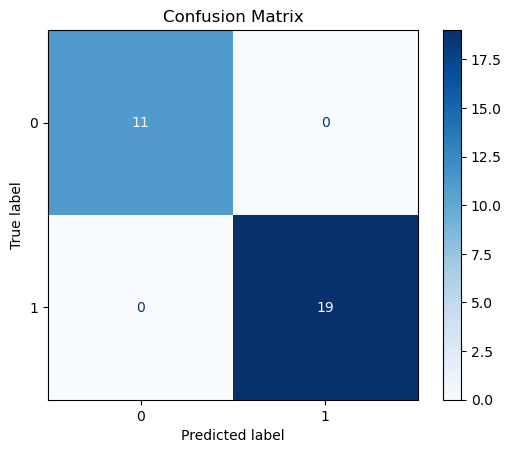

In [14]:
# for training data
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Flatten predictions and labels
y_true = Y.flatten()
y_pred = predictions.astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Optional heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
